In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd1=pd.read_csv('data/case_data_calls.csv',delimiter=';')

In [10]:
print(pd1.head())

       date  calls  weekday
0  1-1-2013   2429        2
1  2-1-2013   3881        3
2  3-1-2013   3560        4
3  4-1-2013   3155        5
4  5-1-2013   1538        6


In [11]:
pd2=pd.read_csv('data/case_data_reservations.csv', delimiter=';')

In [12]:
print(pd2.head())

       date  reservations_2months_advance  total_reservations  summer_break  \
0  1-1-2014                          1494                7794             0   
1  2-1-2014                          2891               20074             0   
2  3-1-2014                          2790               17905             0   
3  4-1-2014                          2504               10880             0   
4  5-1-2014                          1522                8333             0   

   christmas_break  special_day  
0                1            1  
1                1            0  
2                1            0  
3                0            0  
4                0            0  


In [13]:
df=pd1.merge(pd2, left_on='date' , right_on='date')

In [14]:
df.head()

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1-1-2014,1327,3,1494,7794,0,1,1
1,2-1-2014,3417,4,2891,20074,0,1,0
2,3-1-2014,3178,5,2790,17905,0,1,0
3,4-1-2014,1767,6,2504,10880,0,0,0
4,5-1-2014,1374,7,1522,8333,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          790 non-null    object
 1   calls                         790 non-null    int64 
 2   weekday                       790 non-null    int64 
 3   reservations_2months_advance  790 non-null    int64 
 4   total_reservations            790 non-null    int64 
 5   summer_break                  790 non-null    int64 
 6   christmas_break               790 non-null    int64 
 7   special_day                   790 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 49.5+ KB


In [17]:
#convert date to datetime 
df['date']=pd.to_datetime(df['date'], format='%d-%m-%Y')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   calls                         790 non-null    int64         
 2   weekday                       790 non-null    int64         
 3   reservations_2months_advance  790 non-null    int64         
 4   total_reservations            790 non-null    int64         
 5   summer_break                  790 non-null    int64         
 6   christmas_break               790 non-null    int64         
 7   special_day                   790 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 49.5 KB


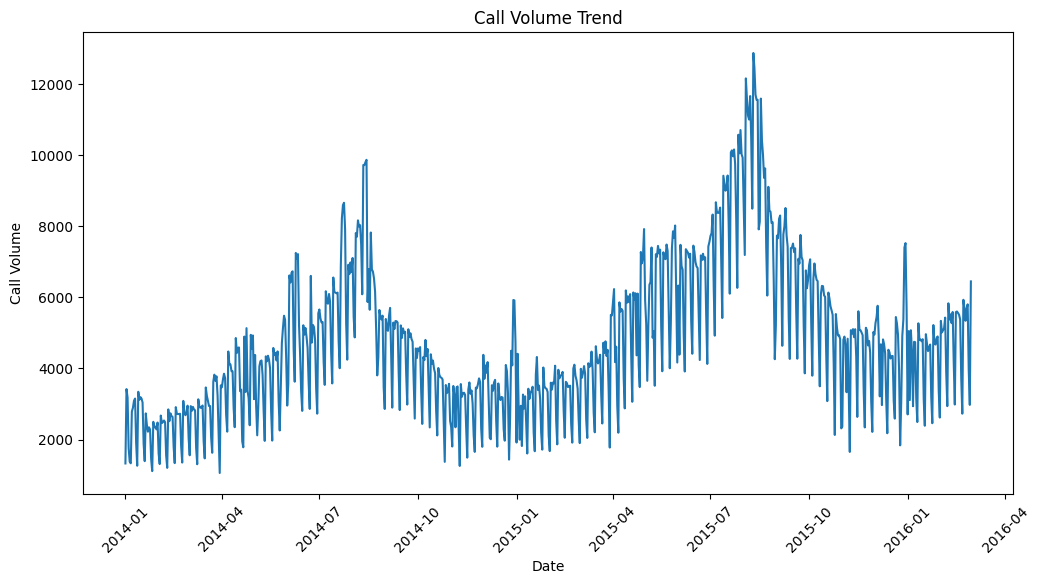

In [21]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the time series plot
sns.lineplot(x="date", y="calls", data=df)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.title('Call Volume Trend')

# Show the plot
plt.show()

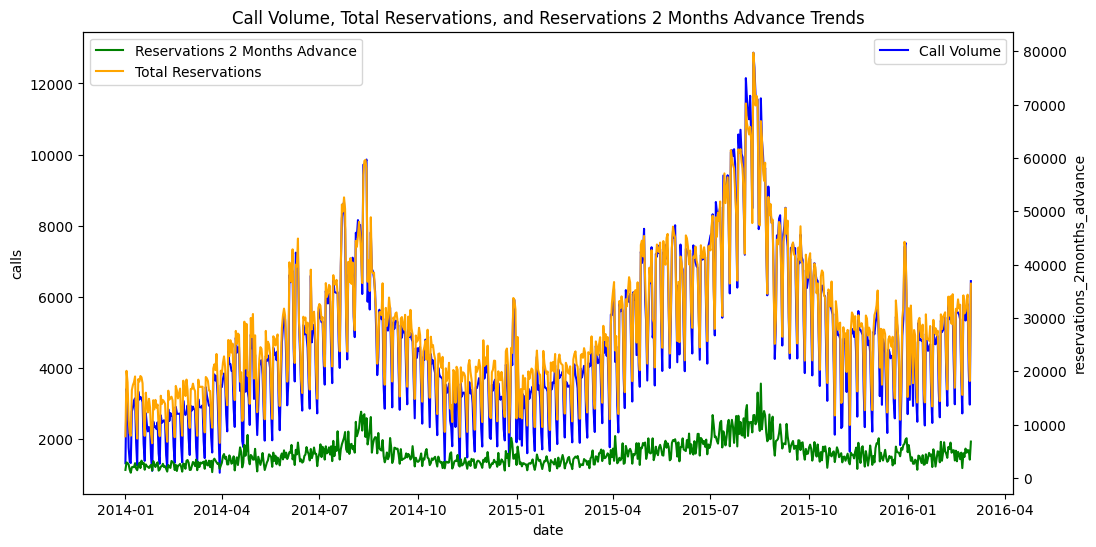

In [23]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the time series plot for call volume
sns.lineplot(x="date", y="calls", data=df, color='blue', label='Call Volume')

# Create secondary y-axis for reservations_2months_advance
ax2 = plt.gca().twinx()
sns.lineplot(x="date", y="reservations_2months_advance", data=df, color='green', ax=ax2, label='Reservations 2 Months Advance')

# Plot total reservations on the primary y-axis
sns.lineplot(x="date", y="total_reservations", data=df, color='orange', label='Total Reservations')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)
# Set the title
plt.title('Call Volume, Total Reservations, and Reservations 2 Months Advance Trends')

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


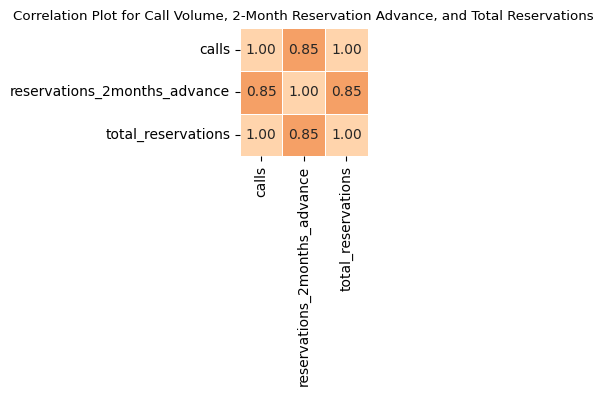

In [24]:
# Select relevant columns
columns_of_interest = ['calls', 'reservations_2months_advance', 'total_reservations']
df_subset = df[columns_of_interest]

# Compute the correlation matrix
corr = df_subset.corr()

# Set up the matplotlib figure with smaller size
plt.figure(figsize=(6, 4))

# Draw the heatmap without the mask
sns.heatmap(corr, annot=True, fmt=".2f", center=0, square=True,
            linewidths=.5, cbar=False)  # Remove the color bar


# Increase font size of annotations
plt.rcParams['font.size'] = 8

plt.title('Correlation Plot for Call Volume, 2-Month Reservation Advance, and Total Reservations')
plt.tight_layout()  # Adjust layout to save space
plt.show()

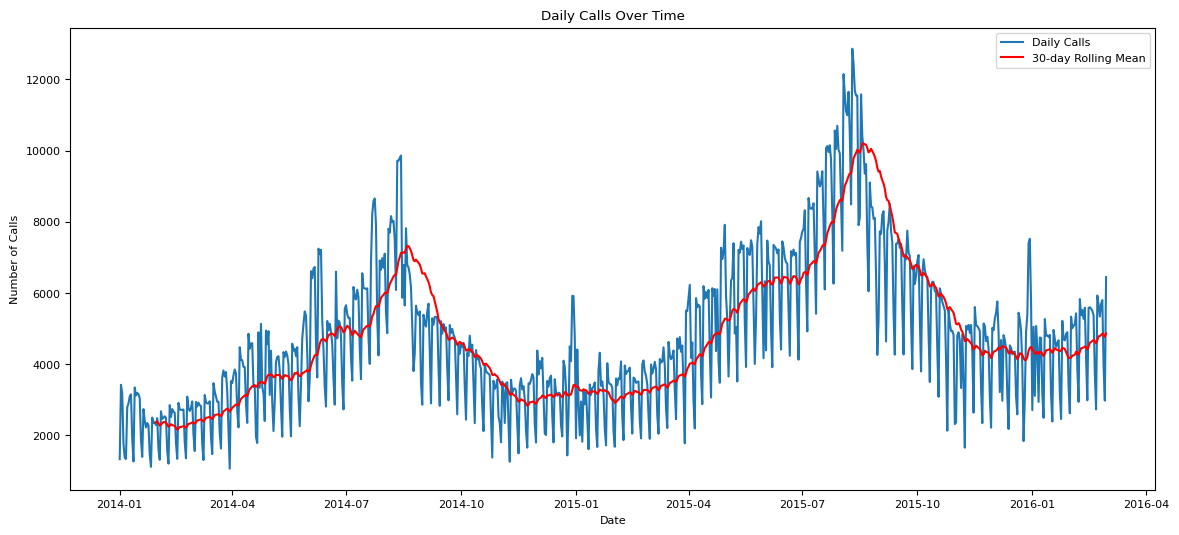

In [26]:
#rolling 30 day mean
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['calls'], label='Daily Calls')
plt.plot(df['date'], df['calls'].rolling(30).mean(), label='30-day Rolling Mean', color='red')
plt.title("Daily Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.legend()
plt.show()


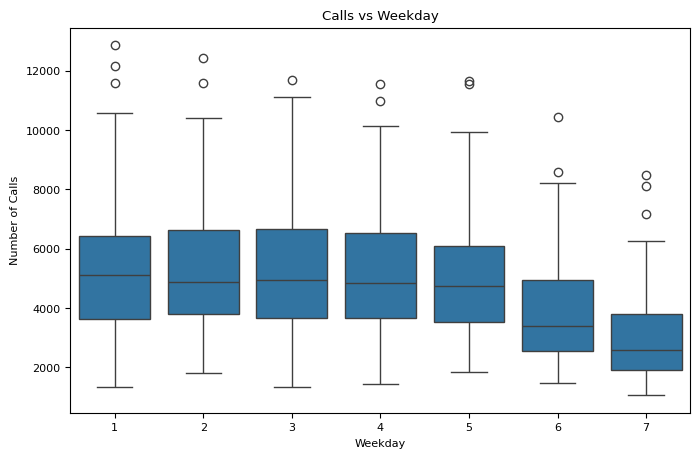

In [27]:
#weekly patterns
#calls vs weekday (0 = monday ,6 = Sunday)

plt.figure(figsize=(8,5))
sns.boxplot(x='weekday',y='calls',data=df)
plt.title('Calls vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Calls')
plt.show()

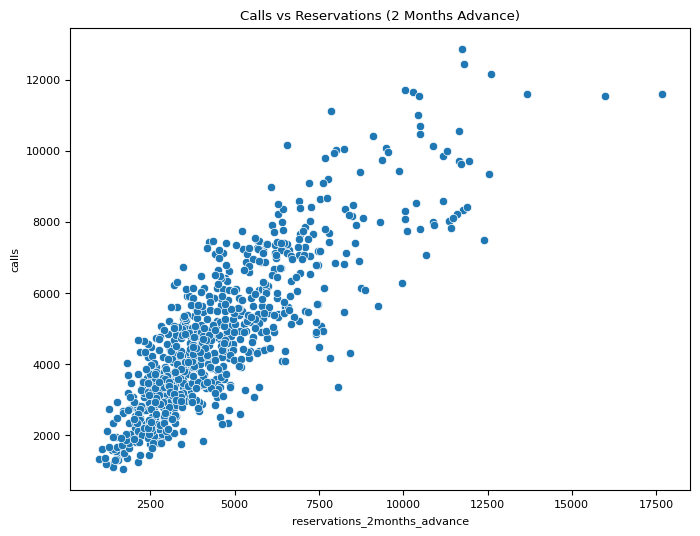

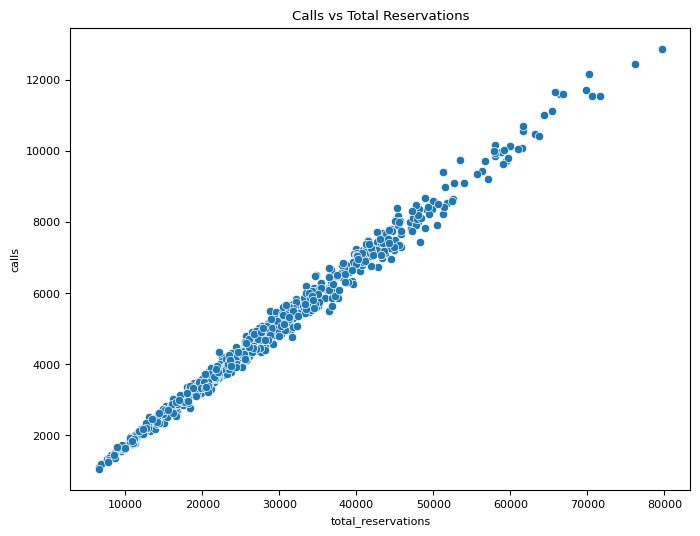

In [28]:
#effect 0f reservations
plt.figure(figsize=(8,6))
sns.scatterplot(x='reservations_2months_advance', y='calls', data=df)
plt.title("Calls vs Reservations (2 Months Advance)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='total_reservations', y='calls', data=df)
plt.title("Calls vs Total Reservations")
plt.show()


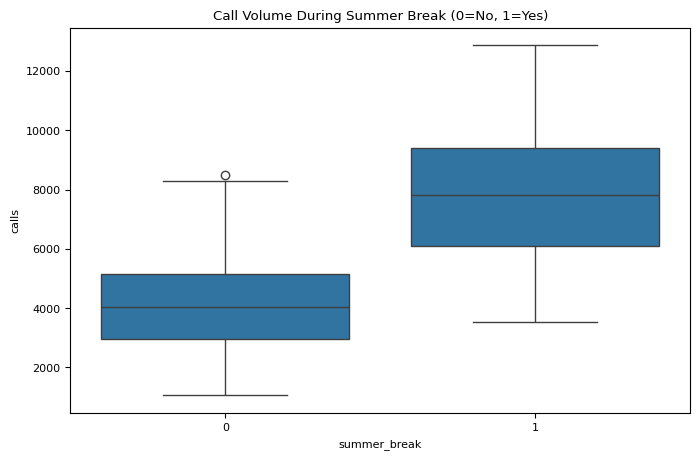

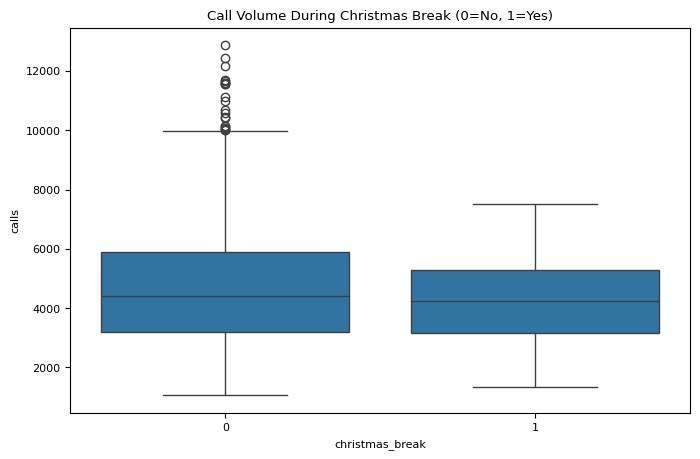

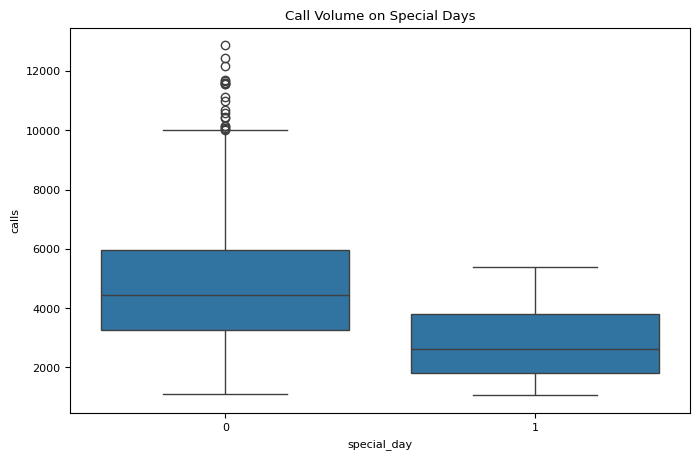

In [29]:
#holidays and breaks
plt.figure(figsize=(8,5))
sns.boxplot(x='summer_break', y='calls', data=df)
plt.title("Call Volume During Summer Break (0=No, 1=Yes)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='christmas_break', y='calls', data=df)
plt.title("Call Volume During Christmas Break (0=No, 1=Yes)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='special_day', y='calls', data=df)
plt.title("Call Volume on Special Days")
plt.show()


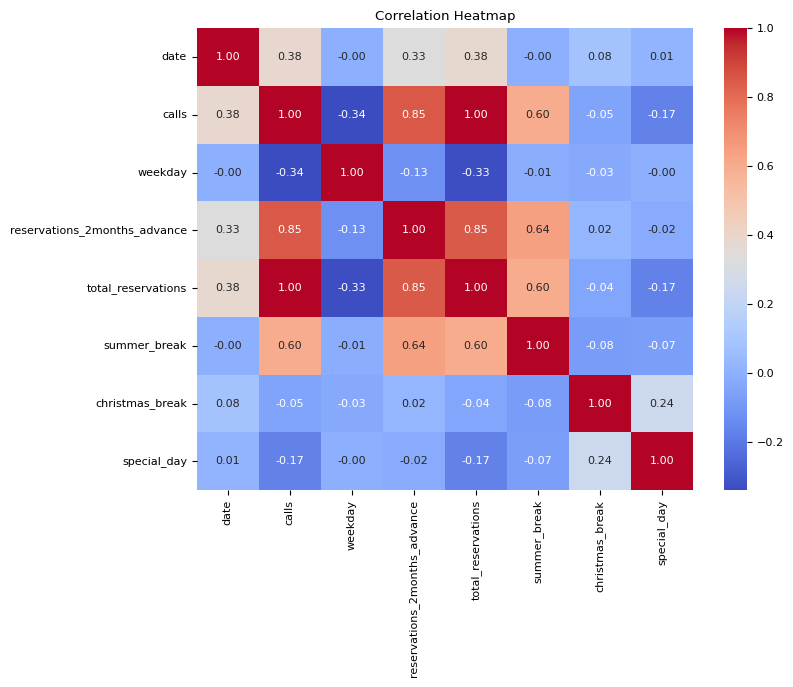

In [30]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


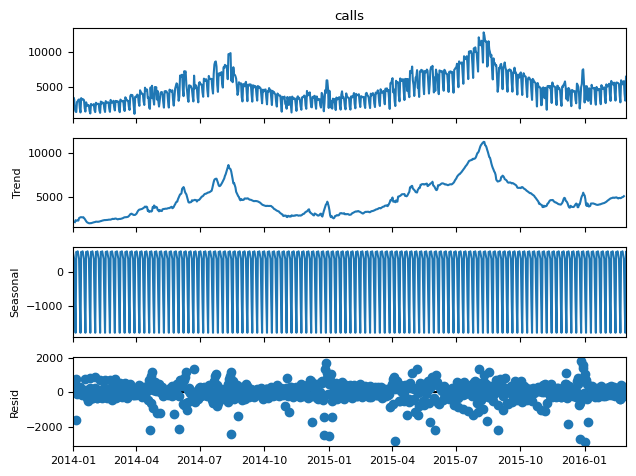

In [32]:
#seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df.set_index('date')['calls'], model='additive', period=7)
decomp.plot()
plt.show()



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   calls                         790 non-null    int64         
 2   weekday                       790 non-null    int64         
 3   reservations_2months_advance  790 non-null    int64         
 4   total_reservations            790 non-null    int64         
 5   summer_break                  790 non-null    int64         
 6   christmas_break               790 non-null    int64         
 7   special_day                   790 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 49.5 KB


In [34]:
#export dataframe to csv

df.to_csv('data/case_data_calls_reservations_preprocessed.csv', index=False)